## Linearly Separable Dataset – Linear Kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.5, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with linear kernel
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.81      1.00      0.89        17

    accuracy                           0.90        40
   macro avg       0.90      0.91      0.90        40
weighted avg       0.92      0.90      0.90        40

[[19  4]
 [ 0 17]]


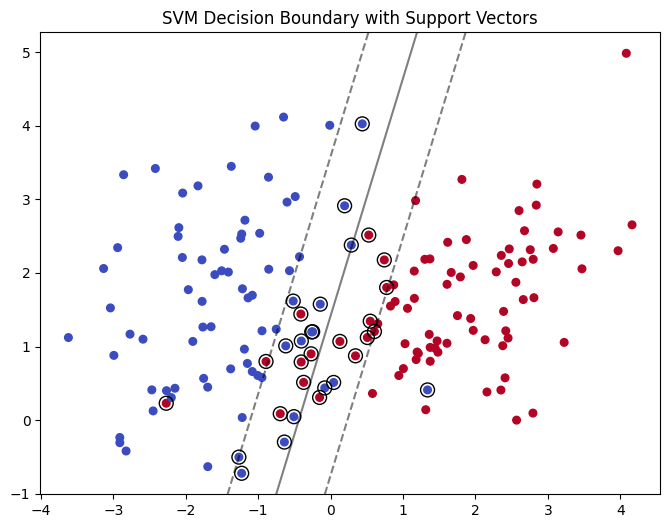

In [2]:
def plot_svm_decision_boundary(clf, X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("SVM Decision Boundary with Support Vectors")
    plt.show()

plot_svm_decision_boundary(clf, X_train, y_train)

## Non-linear Dataset – RBF Kernel

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# RBF kernel
clf_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf_rbf.fit(X_train, y_train)

y_pred = clf_rbf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.96      0.96      0.96        28

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



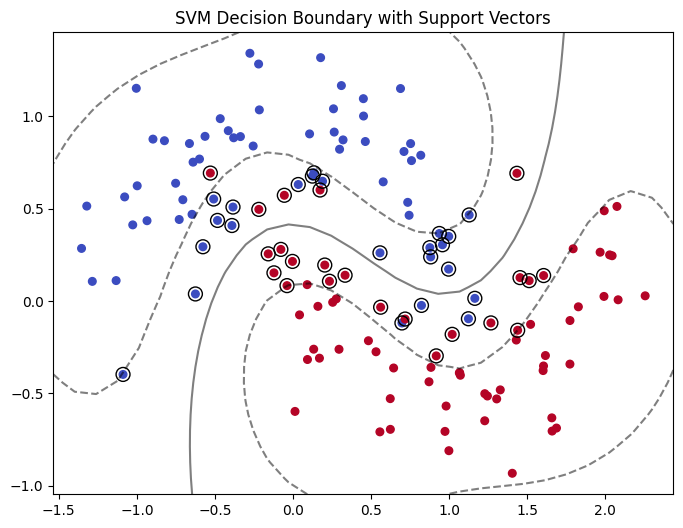

In [4]:
plot_svm_decision_boundary(clf_rbf, X_train, y_train)

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
